Импорт библиотек

In [7]:
import statsmodels.api as sm
import statsmodels
import matplotlib.pyplot as plt
import os

Загрузка датасета

In [8]:
data = sm.datasets.co2.load_pandas()
y = data.data
y.head(20)

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
1958-05-03,316.9
1958-05-10,NaN
1958-05-17,317.5
1958-05-24,317.9
1958-05-31,NaN


Информация о датасете

In [9]:
y.describe()

,co2
count,2225.000000
mean,340.142247
std,17.003885
min,313.000000
25%,324.800000
50%,338.300000
75%,354.800000
max,373.900000


Объединение по месяцам

In [10]:
y = y['co2'].resample('MS').mean()
y = y.fillna(y.bfill())
os.makedirs('./data', exist_ok=True)
y.to_csv('./data/y.csv', index=False)
y.describe()

count    526.000000
mean     339.624826
std       17.110954
min      313.400000
25%      324.025000
50%      337.912500
75%      354.537500
max      373.800000
Name: co2, dtype: float64

Тренировка модели

In [11]:
train = y [:400]
test = y [400:]

fitted_model = statsmodels.tsa.holtwinters.ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=12).fit()

Предсказаени на 12 месяцев

In [12]:
test_predictions = fitted_model.forecast(len(test)+ 24)

Построение графика

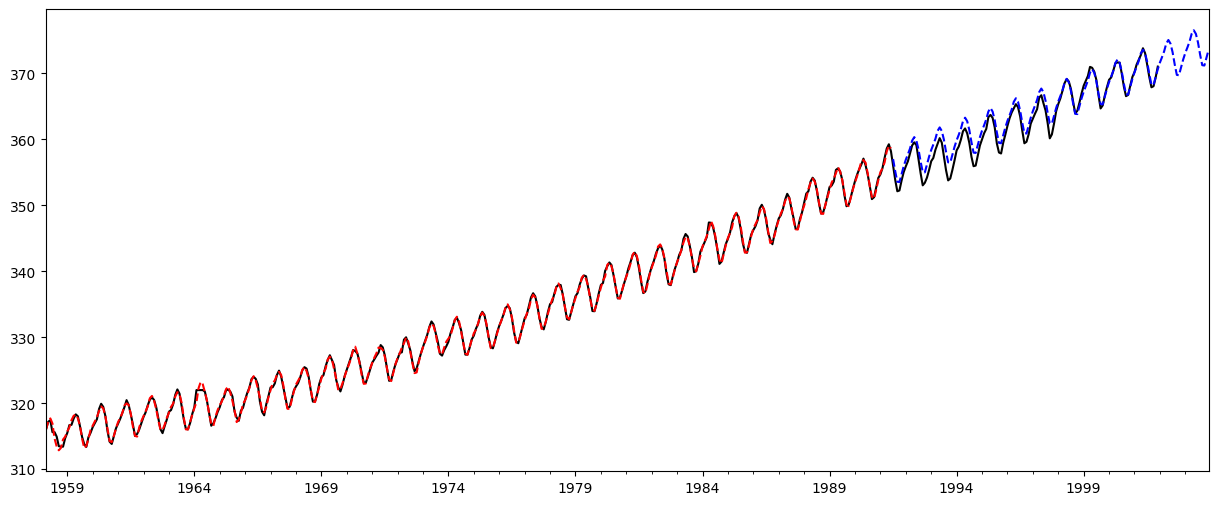

In [13]:
ax = y.plot(
    figsize=(15, 6),
    color='black'
)
fitted_model.fittedvalues.plot(ax=ax, color='red', style='--')
test_predictions.plot(ax=ax, color='blue', style='--')
plt.show()

Подсчет СКО

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(test, test_predictions[:len(test_predictions)-24]))


1.477636691204991


Подсчет точности

In [15]:
print(r2_score(test, test_predictions[:len(test_predictions)-24]))

0.9521895429328726
